In [ ]:
from google.colab import files
uploaded = files.upload()

Saving demographic_info.csv to demographic_info.csv
Saving EEG_data.csv to EEG_data.csv


In [ ]:
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv(io.BytesIO(uploaded['EEG_data.csv']))
data = pd.read_csv(io.BytesIO(uploaded['demographic_info.csv']))

In [ ]:
#merging the data acc to Subject ID
data = data.rename(columns = {'subject ID': 'SubjectID',' gender':'gender',' age':'age',' ethnicity':'ethnicity'})
df = df.merge(data,how = 'inner',on = 'SubjectID')
df.head()

,label,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,age,ethnicity,gender
0,0.0,0.0,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,25,Han Chinese,M
1,0.0,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,25,Han Chinese,M
2,0.0,0.0,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,25,Han Chinese,M
3,0.0,0.0,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,25,Han Chinese,M
4,0.0,0.0,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,25,Han Chinese,M


In [ ]:
df['gender']=df['gender'].replace({'M':1,'F':0})
df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})
df['VideoID'].value_counts()

1.0    1414
0.0    1412
4.0    1356
9.0    1281
8.0    1280
2.0    1274
5.0    1230
3.0    1206
6.0    1181
7.0    1177
Name: VideoID, dtype: int64

In [ ]:
df['predefinedlabel'].value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [ ]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

df.describe()

,label,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,age,ethnicity,gender
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000
mean,0.512606,4.487394,4.390602,41.313871,47.182656,65.628288,6.057873e+05,1.680461e+05,4.138325e+04,3.318419e+04,2.431939e+04,3.814329e+04,2.959277e+04,1.441612e+04,0.479978,25.409960,0.301538,0.799001
std,0.499861,2.865373,2.913232,23.152953,22.655976,598.541528,6.376272e+05,2.441232e+05,7.242636e+04,5.831937e+04,3.838424e+04,7.905932e+04,7.983078e+04,3.603291e+04,0.499618,2.205148,0.641169,0.400763
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2050.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,24.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,27.000000,37.000000,-14.000000,9.810000e+04,2.690000e+04,6.840000e+03,6.850000e+03,6.140000e+03,7.360000e+03,4.060000e+03,2.170000e+03,0.000000,24.000000,0.000000,1.000000
50%,1.000000,4.000000,4.000000,43.000000,51.000000,35.000000,3.950000e+05,8.130000e+04,1.750000e+04,1.500000e+04,1.280000e+04,1.580000e+04,9.760000e+03,5.120000e+03,0.000000,25.000000,0.000000,1.000000
75%,1.000000,7.000000,7.000000,57.000000,63.000000,90.000000,9.170000e+05,2.050000e+05,4.480000e+04,3.455000e+04,2.740000e+04,3.550000e+04,2.490000e+04,1.270000e+04,1.000000,25.000000,0.000000,1.000000
max,1.000000,9.000000,9.000000,100.000000,100.000000,2050.000000,3.960000e+06,3.010000e+06,1.370000e+06,1.020000e+06,1.070000e+06,1.650000e+06,1.970000e+06,1.350000e+06,1.000000,31.000000,2.000000,1.000000


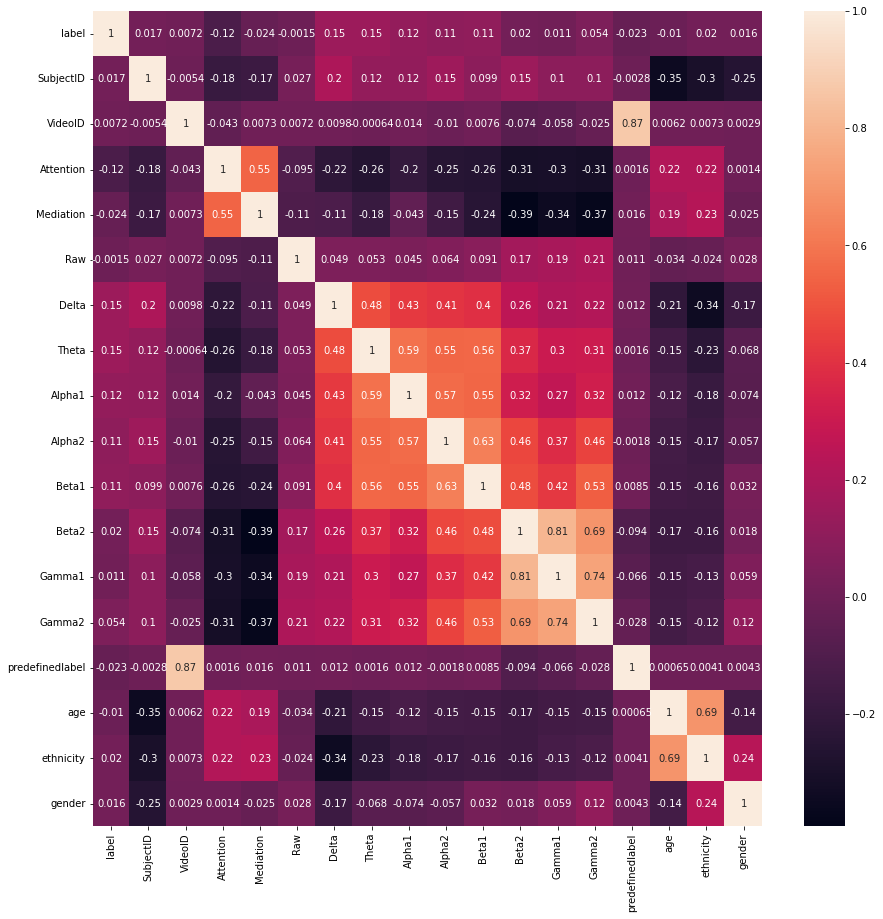

In [ ]:
plt.figure(figsize = (15,15))
cor_matrix = df.corr()
sns.heatmap(cor_matrix,annot=True)

#in the dataset the model is learning based on idds, but we are training the model such that it learns from 
#the EEg readings , ethnicity, and gender

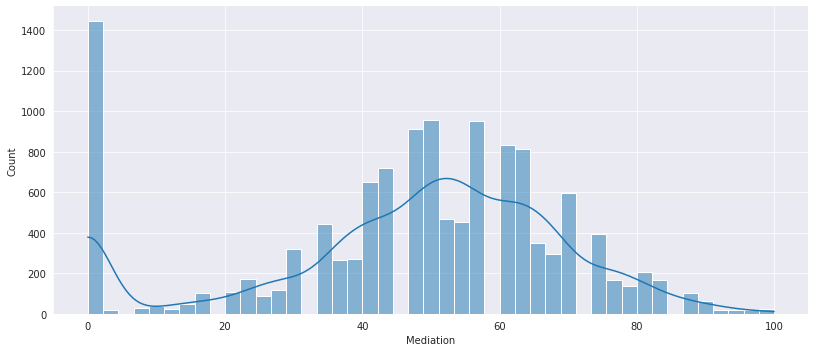

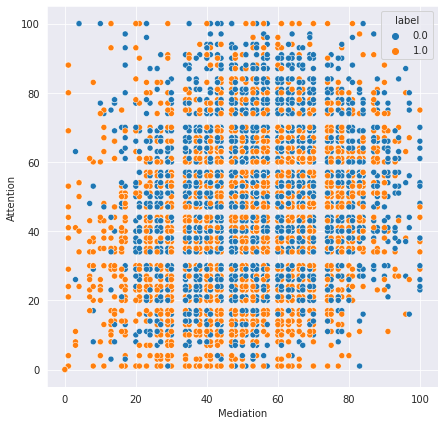

In [ ]:
sns.set_style('darkgrid')
sns.displot(data=df,x='Mediation',kde=True,aspect=16/7)

fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Attention',hue='label')


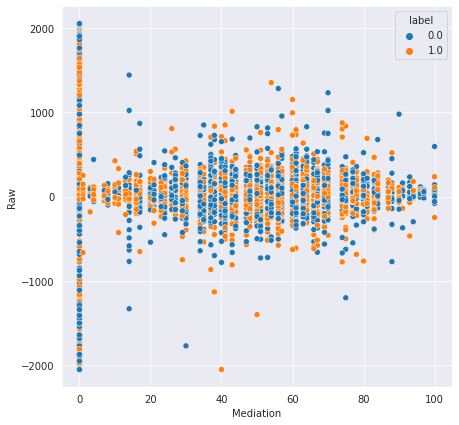

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Raw',hue='label')

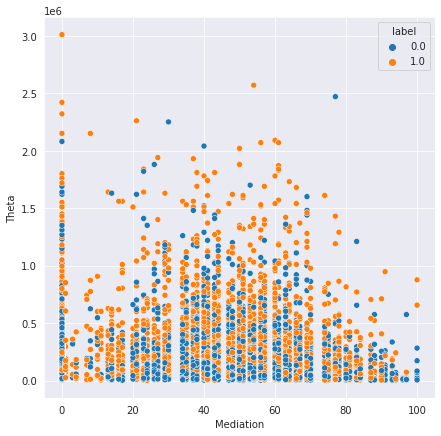

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Theta',hue='label')

In [ ]:
# feature selection
#seprating feature set and target column

from sklearn.feature_selection import mutual_info_classif
y=pd.get_dummies(df['label'])
mi_score=mutual_info_classif(df.drop('label',axis=1),df['label'])
mi_score=pd.Series(mi_score,index=df.drop('label',axis=1).columns)
mi_score=(mi_score*100).sort_values(ascending=False)
mi_score

VideoID            5.605487
Attention          1.909911
Gamma1             1.879672
Delta              1.872488
Alpha2             1.728534
Theta              1.692697
Raw                1.671105
SubjectID          1.435170
Alpha1             1.350871
Beta1              1.249215
Mediation          1.056130
Beta2              0.949584
Gamma2             0.883563
ethnicity          0.833633
predefinedlabel    0.288588
age                0.000000
gender             0.000000
dtype: float64

In [ ]:
#selecting top 14
mi_score.head(14).index
top_fea=['VideoID', 'Attention', 'Alpha2', 'Delta', 'Gamma1', 'Theta', 'Beta1',
       'Alpha1', 'Mediation', 'Gamma2', 'SubjectID', 'Beta2', 'Raw', 'age']

In [ ]:
#scaling feature set
from sklearn.preprocessing import StandardScaler
df_sc=StandardScaler().fit_transform(df[top_fea])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

In [ ]:
from sklearn.model_selection import train_test_split
Xtr,xte,Ytr,yte=train_test_split(df_sc,y,random_state=108,test_size=0.27)
xtr,xval,ytr,yval=train_test_split(Xtr,Ytr,random_state=108,test_size=0.27)

In [ ]:

# Model-Building step, stacking the hidden layers
model=keras.Sequential([
    layers.Dense(64,input_shape=(14,),activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(124,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(248,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),   
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),   
    layers.Dense(664,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),
    layers.Dense(264,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(124,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(2,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adamax',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
#Creating the callback feature to stop the training in-Between, in case of no improvement
call=callbacks.EarlyStopping(patience=20,min_delta=0.0001,restore_best_weights=True)
#Fitting the model
history=model.fit(xtr,ytr,validation_data=(xval,yval),batch_size=28,epochs=150,callbacks=[call])

Epoch 1/150
244/244 [==============================] - 9s 20ms/step - loss: 0.8617 - accuracy: 0.5305 - val_loss: 0.7262 - val_accuracy: 0.5269
Epoch 2/150
244/244 [==============================] - 5s 19ms/step - loss: 0.7662 - accuracy: 0.5609 - val_loss: 0.6771 - val_accuracy: 0.6041
Epoch 3/150
244/244 [==============================] - 5s 19ms/step - loss: 0.7388 - accuracy: 0.5655 - val_loss: 0.6742 - val_accuracy: 0.6077
Epoch 4/150
244/244 [==============================] - 5s 19ms/step - loss: 0.7138 - accuracy: 0.5904 - val_loss: 0.6477 - val_accuracy: 0.6291
Epoch 5/150
244/244 [==============================] - 5s 19ms/step - loss: 0.6873 - accuracy: 0.6118 - val_loss: 0.6303 - val_accuracy: 0.6489
Epoch 6/150
244/244 [==============================] - 5s 19ms/step - loss: 0.6771 - accuracy: 0.6113 - val_loss: 0.6368 - val_accuracy: 0.6382
Epoch 7/150
244/244 [==============================] - 5s 19ms/step - loss: 0.6663 - accuracy: 0.6214 - val_loss: 0.6303 - val_accuracy:

In [ ]:
model.evaluate(xte,yte)

109/109 [==============================] - 1s 9ms/step - loss: 0.1505 - accuracy: 0.9448


[0.15051065385341644, 0.9447817206382751]

In [ ]:
training=pd.DataFrame(history.history)

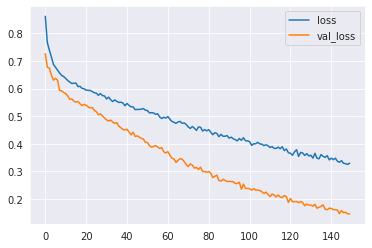

In [ ]:
training.loc[:,['loss','val_loss']].plot()

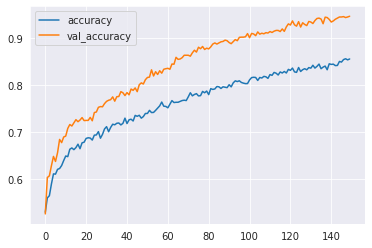

In [ ]:
training.loc[:,['accuracy','val_accuracy']].plot()

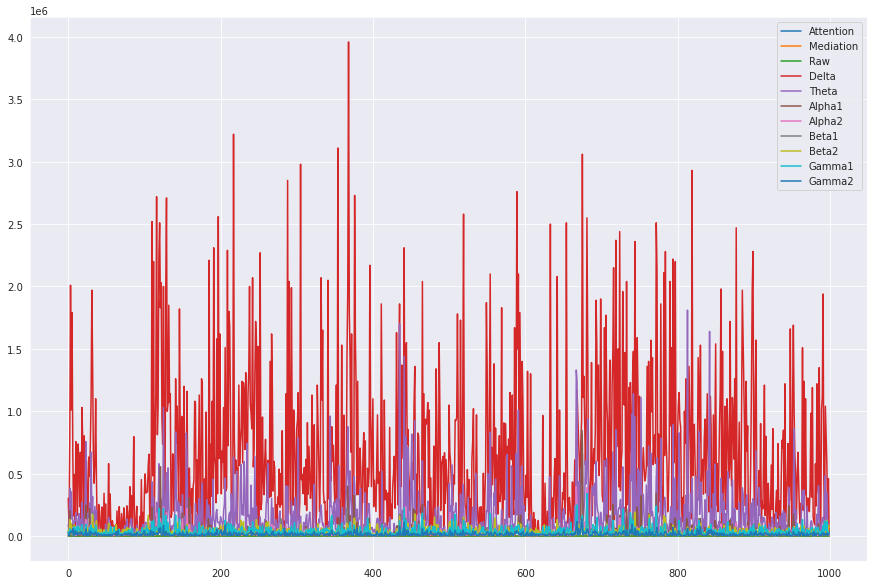

In [ ]:

y= df.pop('label')
x= df
x.iloc[:1000,:11].plot(figsize = (15,10))

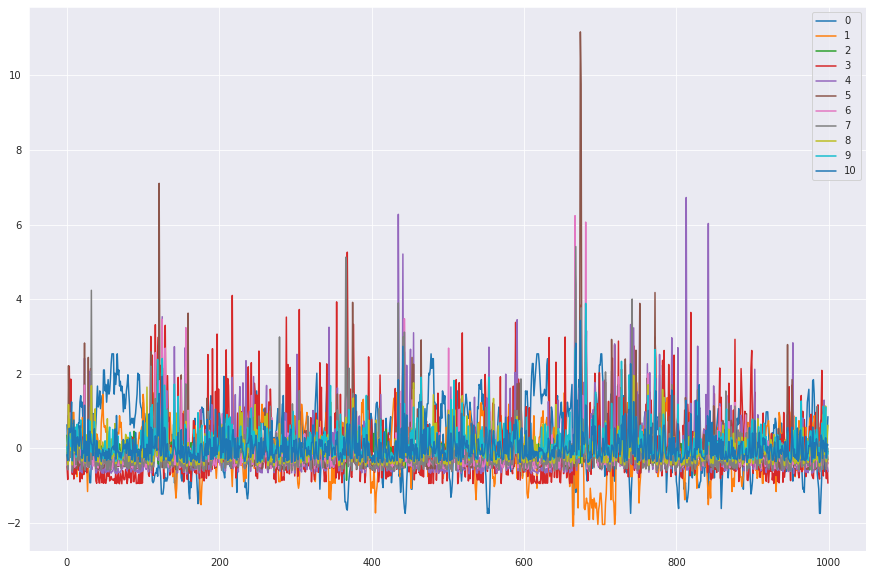

In [ ]:
x = StandardScaler().fit_transform(x)
pd.DataFrame(x).iloc[:1000,:11].plot(figsize = (15,10))